In [1]:
import numpy as np
from astropy import coordinates as coo
from astropy import units as u
import healpy as hp
import matplotlib.pyplot as plt
import multiprocessing as mp
from astropy.io import fits
from data_process import calculate_jackknife_variance, load_calculation_data, calculate_jackknife_variance_global

In [2]:
Nside_jack = 4

In [30]:
r_p, dat = load_calculation_data('../calculation_data/result_r=3_100_8_quasar_highz_CMB_lcut_n_2048_tree.npy', return_rp=True)

value = dat[0]
weight = dat[1]

quasar_cata = np.load('../catalogue/quasar_highz.npy')
c = coo.SkyCoord(ra=quasar_cata['ra']*u.degree, dec=quasar_cata['dec']*u.degree)

l = c.galactic.l.to(u.rad).value
b = c.galactic.b.to(u.rad).value
pix = hp.ang2pix(Nside_jack, theta=np.pi/2-b, phi=l)

print('finish loading quasar catalogue')


finish loading quasar catalogue


In [26]:
savefig = False

## quasar sample

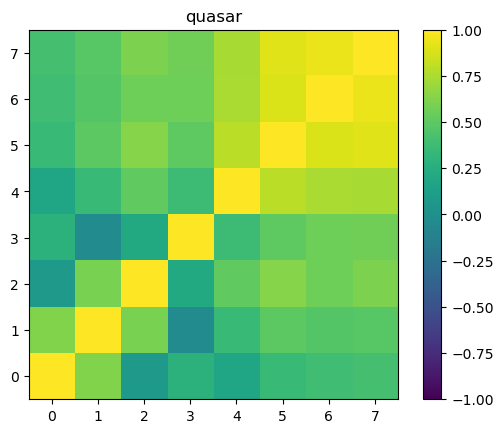

In [31]:
sampler_q = calculate_jackknife_variance_global(value, weight, pix, norm_cov=True)
plt.imshow(sampler_q['cov'], origin='lower', vmin=-1, vmax=1)
plt.colorbar()
plt.title('quasar')
if savefig:
    plt.savefig('./fig/cov_q')
plt.show()

## signal

In [32]:
np.savetxt('./results/quasar_highz_8_cmb_lcut_n_2048', np.c_[r_p, sampler_q['mean'], sampler_q['std']])